In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets

import subkmeans

## Test on small synthetic dataset

In [2]:
data = np.array([[1,1],[1.1,1.1],[0.9,0.9], [5,5],[5.2,4.9], [4.8,5.3]])

In [3]:
X = preprocessing.scale(data)

In [8]:
kmeans = subkmeans.SubKmeans(2, X)
comp = SubKMeans.SubKMeans(2)

NameError: name 'SubKMeans' is not defined

In [9]:
kmeans._find_cluster_assignment()
print(comp.get_projection_matrix(1,2))

NameError: name 'comp' is not defined

In [10]:
print(kmeans.m)
print(comp.m)

1


NameError: name 'comp' is not defined

In [14]:
kmeans.run()

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [15]:
print(kmeans.assignments)

defaultdict(<class 'list'>, {0: [array([-0.99792315, -0.99785695]), array([-0.948027  , -0.94878202]), array([-1.04781931, -1.04693188])], 1: [array([0.99792315, 0.96514033]), array([1.09771547, 0.9160654 ]), array([0.89813084, 1.11236512])]})


In [16]:
print(kmeans.centroids)

[[-0.99792315 -0.99785695]
 [ 0.99792315  0.99785695]]


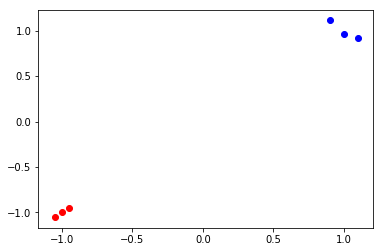

In [18]:
cluster1 = np.vstack(kmeans.assignments[0])
cluster2 = np.vstack(kmeans.assignments[1])
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')

## Testing on Wine

In [31]:
wine = datasets.load_wine()
print(wine.data.shape)

(178, 13)


In [20]:
X = preprocessing.scale(wine.data)
kmeans = subkmeans.SubKmeans(3, X)

In [21]:
kmeans.run()

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


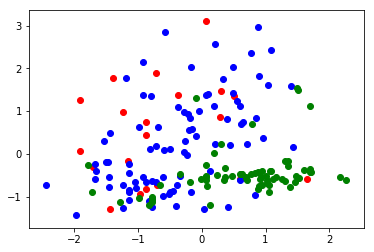

In [22]:
cluster1 = np.vstack(kmeans.assignments[0])
cluster2 = np.vstack(kmeans.assignments[1])
cluster3 = np.vstack(kmeans.assignments[2])
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,1], color='green')

### Project to cluster space

In [23]:
c1 = (kmeans.pc.T @ kmeans.transform.T @ cluster1.T).T
c2 = (kmeans.pc.T @ kmeans.transform.T @ cluster2.T).T
c3 = (kmeans.pc.T @ kmeans.transform.T @ cluster3.T).T
other = (comp.pT @ comp.V @ comp.X.T).T

NameError: name 'comp' is not defined

/usr/lib/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


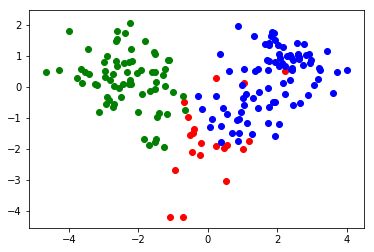

In [24]:
plt.scatter(c1[:,0], c1[:,1], color='red')
plt.scatter(c2[:,0], c2[:,1], color='blue')
plt.scatter(c3[:,0], c3[:,1], color='green')

## Test on sample dataset provided by original authors

In [111]:
# dataset from authors
sample = np.genfromtxt('test/sample.dat', delimiter=';')

# result of running original scala code on dataset
sample_result = np.genfromtxt('test/sample_result.dat', delimiter=';')

In [112]:
X = preprocessing.scale(sample[:,1:6])
kmeans = subkmeans.SubKmeans(3, X)

In [113]:
kmeans.run()

/usr/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


/usr/lib/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


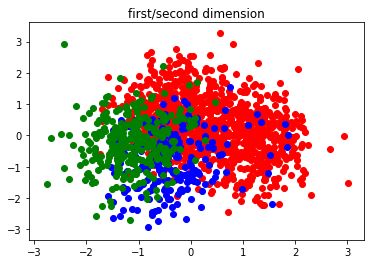

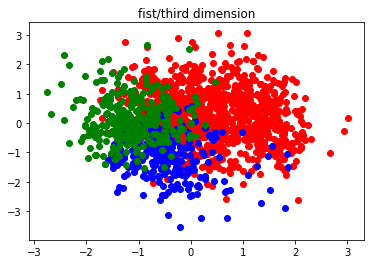

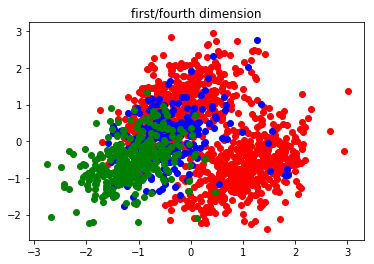

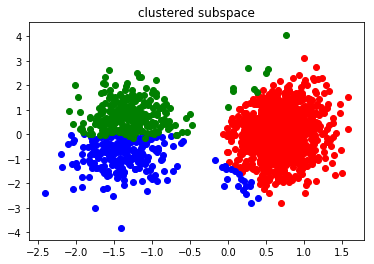

In [114]:
cluster1 = np.vstack(kmeans.assignments[0])
cluster2 = np.vstack(kmeans.assignments[1])
cluster3 = np.vstack(kmeans.assignments[2])

# cluster subspace projection
c1 = (kmeans.pc.T @ kmeans.transform.T @ cluster1.T).T
c2 = (kmeans.pc.T @ kmeans.transform.T @ cluster2.T).T
c3 = (kmeans.pc.T @ kmeans.transform.T @ cluster3.T).T

plt.figure()
plt.scatter(cluster1[:,0], cluster1[:,1], color='red')
plt.scatter(cluster2[:,0], cluster2[:,1], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,1], color='green')
plt.title('first/second dimension')
plt.figure()
plt.scatter(cluster1[:,0], cluster1[:,2], color='red')
plt.scatter(cluster2[:,0], cluster2[:,2], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,2], color='green')
plt.title('fist/third dimension')
plt.figure()
plt.scatter(cluster1[:,0], cluster1[:,3], color='red')
plt.scatter(cluster2[:,0], cluster2[:,3], color='blue')
plt.scatter(cluster3[:,0], cluster3[:,3], color='green')
plt.title('first/fourth dimension')
plt.figure()
plt.scatter(c1[:,0], c1[:,1], color='red')
plt.scatter(c2[:,0], c2[:,1], color='blue')
plt.scatter(c3[:,0], c3[:,1], color='green')
plt.title('clustered subspace');

### Check our results against Scala results

In [120]:
sample_c1 = sample_result[np.where(sample_result[:,0] == 0),:]
sample_c2 = sample_result[np.where(sample_result[:,0] == 1),:]
sample_c3 = sample_result[np.where(sample_result[:,0] == 2),:]

cluster1.sort() == sample_c1.sort() and cluster2.sort() == sample_c2.sort() and cluster3.sort() == sample_c2.sort()

True